# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, maybe 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 may be corrupted, before is better
# ipath= "./data/NCDC/cn/tianjing/dat.txt"  
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # could apply width/length constrain
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data
# ipath= "./data/NCDC/gran_canaria/dat.txt" # problem
# ipath= "./data/NCDC/tenerife_norte/dat.txt" # truncate

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,2.813470e+05,281347.000000,281347.00000,281347.000000,281347.000000
mean,2.001544e+07,1106.450579,181.14116,3.947066,158.748975
std,9.786473e+04,681.443079,114.82452,1.800596,107.843629
min,1.980010e+07,0.000000,0.00000,0.500000,0.000000
25%,1.993113e+07,500.000000,80.00000,3.000000,70.000000
50%,2.003082e+07,1100.000000,160.00000,4.000000,140.000000
75%,2.010111e+07,1700.000000,300.00000,5.000000,250.000000
max,2.015030e+07,2357.000000,359.00000,30.000000,350.000000


False


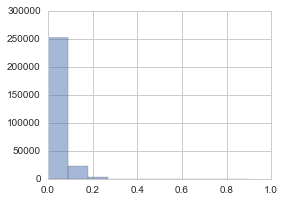

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure('Decimal','Frequency')
    plt.legend(loc='best')

print knot_unit

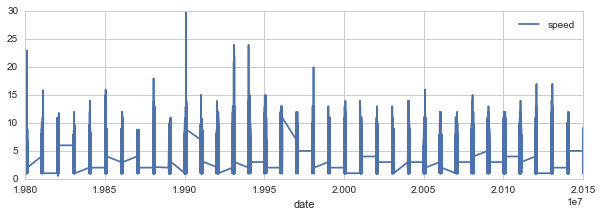

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

D:\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


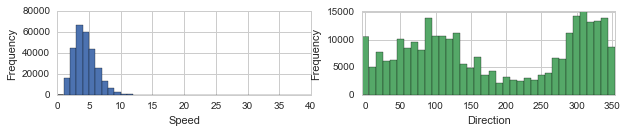

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
19940128,19940128,0,FM-15,119,3.0,331,0.0
19940718,19940718,1000,FM-15,337,5.0,113,0.0
19940805,19940805,1100,FM-15,335,9.0,115,0.0
19940810,19940810,500,FM-15,319,10.0,131,0.0
19940903,19940903,2100,FM-15,331,5.0,119,0.0
19941203,19941203,1400,FM-15,316,3.0,134,0.0
19950403,19950403,1300,FM-15,337,3.0,113,0.0
19980603,19980603,1100,FM-15,59,10.0,31,0.0
19980909,19980909,1200,FM-15,359,20.0,91,0.0


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
19900917,19900917,0,SY-MT,130,30.0,320,0.0,27.9,24.9
19931012,19931012,2300,FM-16,320,24.0,130,0.0,22.0,20.0
19940127,19940127,2300,FM-16,170,24.0,280,0.0,21.0,20.0
19801008,19801008,2100,FM-12,0,23.0,90,0.0,21.0,19.0
19931221,19931221,2200,FM-15,110,22.0,340,0.0,19.0,20.0
19800714,19800714,900,FM-12,280,22.0,170,0.0,20.0,20.0
19930802,19930802,1400,FM-15,140,21.0,310,0.0,17.0,19.0
19880507,19880507,25,FM-15,170,18.0,280,0.0,11.0,8.2
20130801,20130801,730,FM-15,170,17.0,280,0.0,12.0,7.0


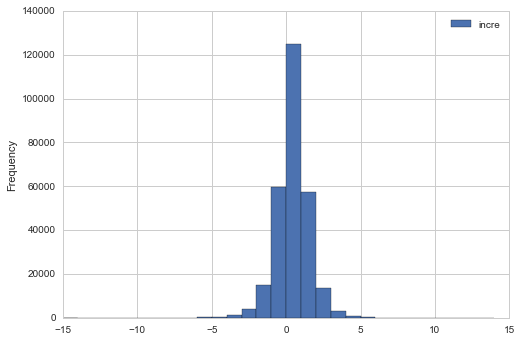

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 9


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
19880507,19880507,25,FM-15,170,18.0,280,0.0,11.0,8.2
20120808,20120808,530,FM-15,0,17.0,90,0.0,2.0,4.0
20130801,20130801,730,FM-15,170,17.0,280,0.0,12.0,7.0
19850430,19850430,800,FM-15,310,16.0,140,0.0,9.8,11.0
20050911,20050911,1700,FM-15,0,16.0,90,0.0,4.0,4.0
19811219,19811219,700,FM-15,140,15.9,310,0.9,7.9,3.1
19811219,19811219,500,SY-MT,140,15.9,310,0.9,7.9,7.9
19850312,19850312,900,SY-MT,0,15.0,90,0.0,9.9,10.9
19910209,19910209,600,SY-MT,200,15.0,250,0.0,10.9,9.9


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0      10555
10      5130
20      7804
30      6064
40      6251
50     10110
60      8530
70      9575
80      8128
90     13902
100    10757
110    10636
120    10161
130    11167
140     5624
150     4938
160     6934
170     3546
180     4387
190     2173
200     3221
210     2703
220     2529
230     3030
240     2716
250     3684
260     3877
270     6740
280     6489
290    11213
300    14350
310    15205
320    13146
330    13326
340    13999
350     8728
Name: dir, dtype: int64

In [13]:
effective_column = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_column) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

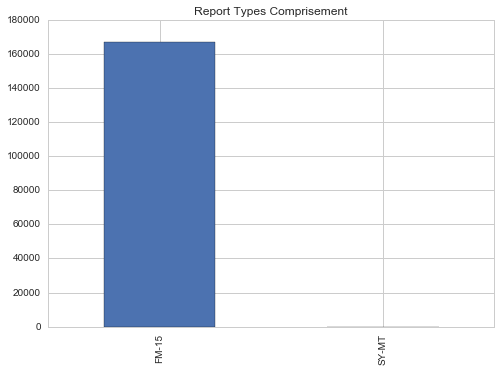

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

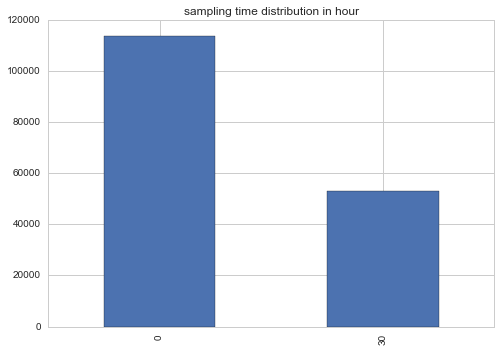

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       7027
100     8319
200     8613
300     7538
400     8951
500     8956
600     7690
700     9245
800     9308
900     7970
1000    8956
1100    8634
1200    7622
1300    8263
1400    7913
1500    6972
1600    7328
1700    7150
1800    6498
1900    6973
2000    6956
2100    6562
2200    7283
2300    7508
Name: HrMn, dtype: int64

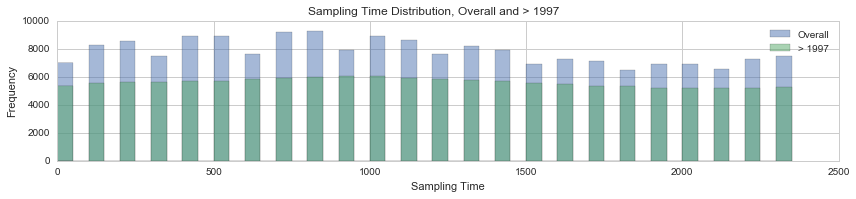

In [17]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend='best',
             title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)
plt.gcf().set_size_inches(14, 2.5)

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5, label='Original Data')
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5, label='Redistributed Data')
    plt_configure(xlabel="Direction", ylabel="Frequency", legend=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.gcf().set_size_inches(10, 4)
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

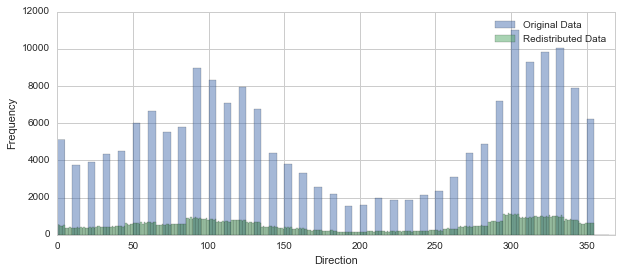

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Original Data')
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(10, 4), label='Redistributed Data')
    plt_configure(xlabel="Speed", ylabel="Frequency", legend=True)
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

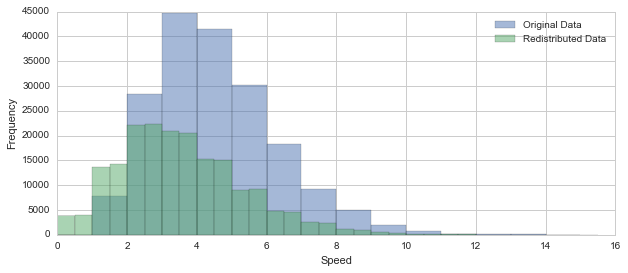

In [21]:
# # Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

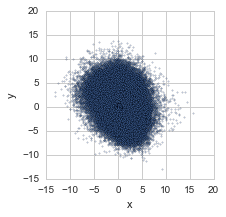

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax, s=2)
plt.gcf().set_size_inches(14, 3)

## 1.4 Time Shift Comparison

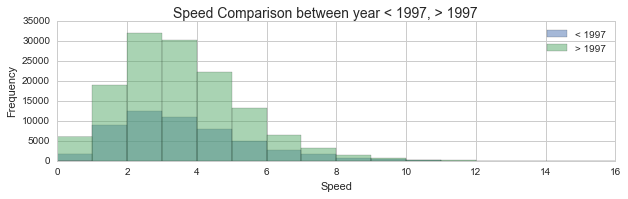

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True)
plt.gcf().set_size_inches(10, 2.5)

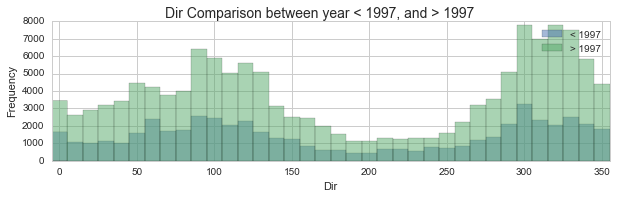

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend=True)
plt.autoscale(enable=True, axis='x', tight=True)
plt.gcf().set_size_inches(10, 2.5)

1985 - 1989


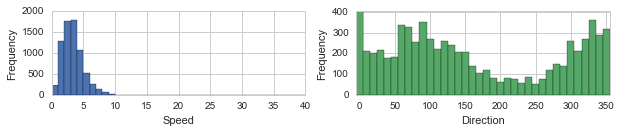

1990 - 1994


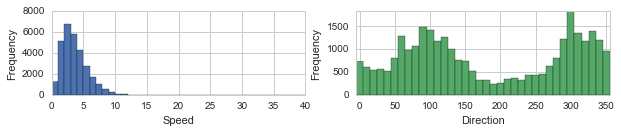

1995 - 1999


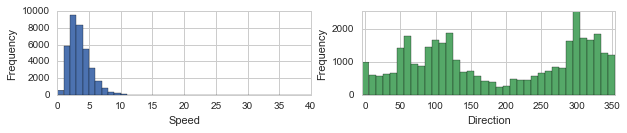

2000 - 2004


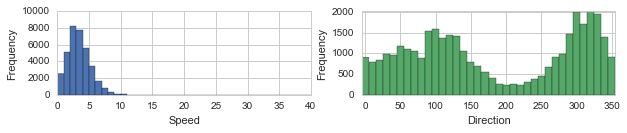

2005 - 2009


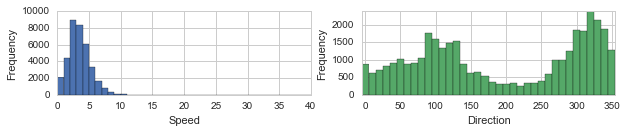

2010 - 2014


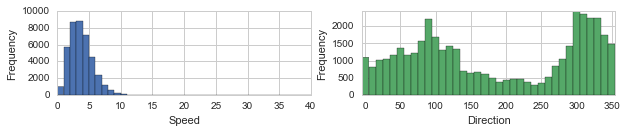

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time//10000, end_time//10000-1)
            print title
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 10
Report type used: FM-15
Sampling time used: 0


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,4.057000e+04,40570.000000,40570.000000,40570.000000,40570.000000,40570.0,40570.000000,40570.000000,40570.000000,40570.000000
mean,2.012083e+07,1137.670693,184.959382,3.751300,152.993098,0.0,0.008578,0.008430,0.883013,0.378061
std,1.407122e+04,685.007356,115.976447,1.832103,106.550156,0.0,0.886869,0.897068,2.524838,3.183037
min,2.010010e+07,0.000000,-4.991792,0.003648,0.000000,0.0,-9.000000,-12.000000,-11.688984,-10.584760
25%,2.011041e+07,600.000000,83.271687,2.396845,70.000000,0.0,0.000000,0.000000,-0.650807,-1.907179
50%,2.012071e+07,1100.000000,163.624792,3.539292,130.000000,0.0,0.000000,0.000000,1.150358,0.106912
75%,2.013093e+07,1700.000000,304.766319,4.854913,230.000000,0.0,1.000000,1.000000,2.686246,2.715156
max,2.014123e+07,2300.000000,354.998919,14.391594,350.000000,0.0,8.000000,8.000000,14.359751,13.464629


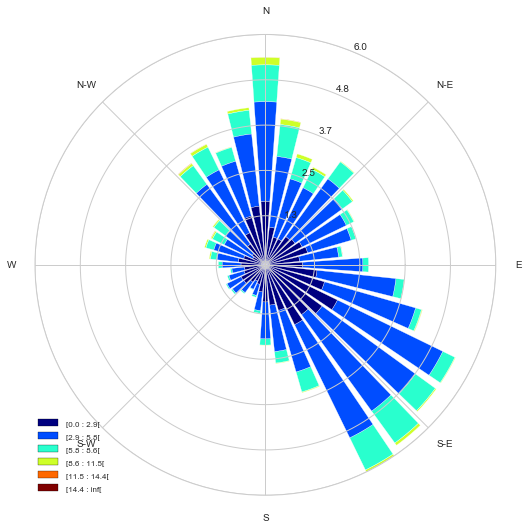

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

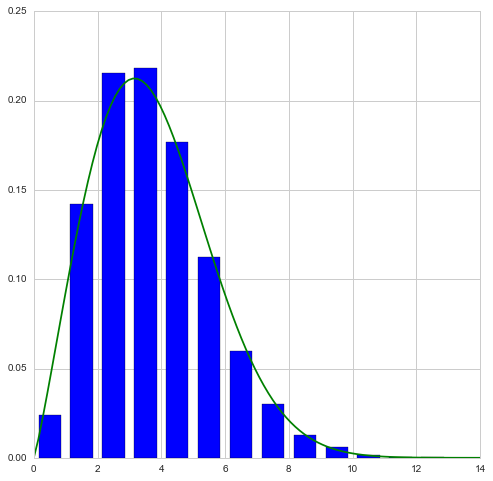

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

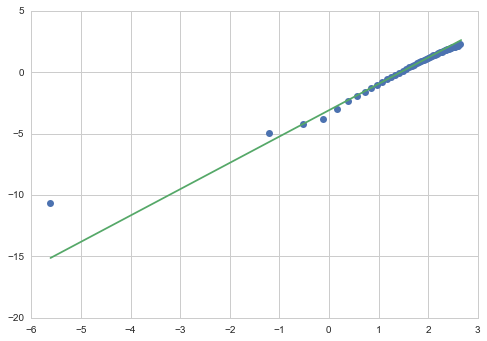

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
# or
# y=sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


In [32]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [33]:
sample = SPEED_SET

In [34]:
# # The bandwidth value sometimes would be too radical
# from sklearn.grid_search import GridSearchCV

# if knot_unit:
#     bandwidth_range = arange(0.5,2,0.2)
# else:
#     bandwidth_range = arange(0.4,1,0.1)

# grid = GridSearchCV(neighbors.KernelDensity(),
#                     {'bandwidth': bandwidth_range},
#                     n_jobs=-1, cv=4) 
# grid.fit(sample)
# bandwidth = grid.best_params_['bandwidth']

In [35]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.7 289
[  8.64489328e-09   3.79037069e-08   9.17021676e-08   9.07139516e-07
   3.67731030e-06]


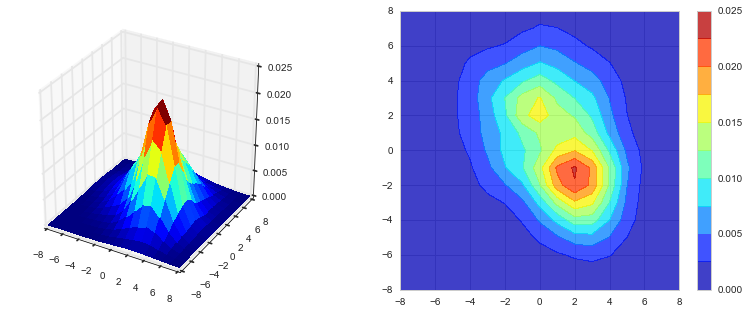

In [36]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

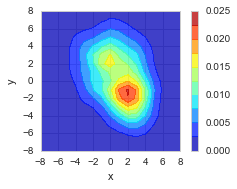

In [37]:
plot_2d_prob_density(X,Y,kde_Z, xlabel='x', ylabel='y')
plt.gcf().set_size_inches(4, 2.5)

In [38]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [39]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [40]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.410,2.079,-1.817,1.657,2.207,-0.235
2,0.302,1.442,2.550,2.174,2.783,-0.211
3,0.289,-1.399,1.222,2.385,2.759,-0.242


GMM Plot Result
0.40960374606 [[ 2.07918435 -1.81683481]] [ 1.56257568  2.27446722] -160.530086834
0.301828546458 [[ 1.44159236  2.55000771]] [ 2.06415166  2.86604393] -159.89285374
0.288567707482 [[-1.39912531  1.2218209 ]] [ 2.18867743  2.91719665] -150.596240131


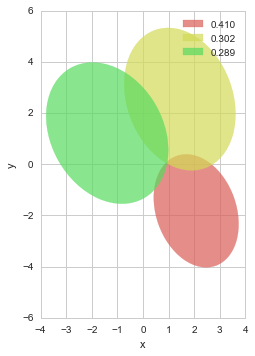

In [41]:
plot_gmm_ellipses(gmm_em_result)

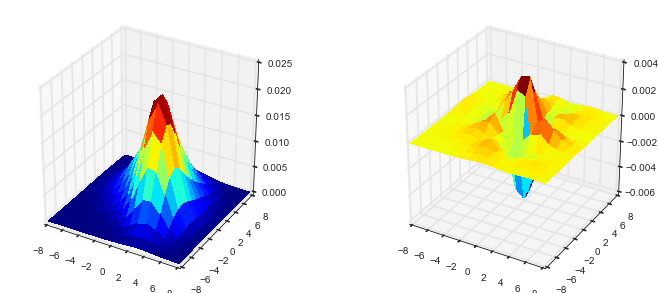

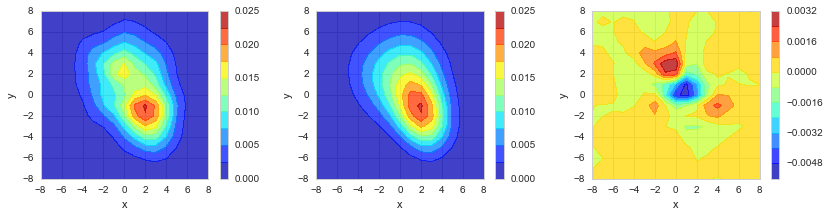

In [42]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1, xlabel='x',ylabel='y')
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2, xlabel='x',ylabel='y')
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3, xlabel='x',ylabel='y')

## Goodness-of-fit Statistics

In [43]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.021035,0.026783,6.449346e-07,0.03505,0.234244,0.972558


# 5. GMM by Optimization

In [44]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()

In [45]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.54176345771114
     jac: array([ -4.74489212e-01,   1.07288361e-06,  -1.43051147e-06,
         1.19209290e-07,  -9.53674316e-07,   2.50339508e-06,
        -4.74485397e-01,  -3.57627869e-07,   1.54972076e-06,
        -9.53674316e-07,  -3.57627869e-07,   5.96046448e-07,
        -4.74497318e-01,   1.19209290e-07,  -5.96046448e-07,
         0.00000000e+00,   3.57627869e-07,  -1.19209290e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1394
     nit: 68
    njev: 68
  status: 0
 success: True
       x: array([ 0.5887819 ,  0.05057683,  1.91950762,  2.81609336,  3.03524376,
        0.01347707,  0.37790082,  2.28040047, -1.96259397,  1.6401071 ,
        2.00103121, -0.06120877,  0.03331728, -0.45971407,  2.81413744,
        1.21738038,  0.88517964, -0.01884001])

## 5.1 GMM Result

In [46]:
# gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.589,0.051,1.920,2.816,3.035,0.013
2,0.378,2.280,-1.963,1.640,2.001,-0.061
3,0.033,-0.460,2.814,1.217,0.885,-0.019


GMM Plot Result
0.588781896652 [[ 0.05057683  1.91950762]] [ 2.81426999  3.03693446] 174.90724853
0.377900819399 [[ 2.28040047 -1.96259397]] [ 1.63092944  2.00851845] -171.500412411
0.0333172839495 [[-0.45971407  2.81413744]] [ 0.88484653  1.21762251] -91.6635041932


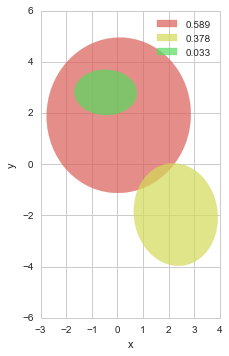

In [47]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [48]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.018044,0.011477,1.779500e-07,0.018411,0.123044,0.992428


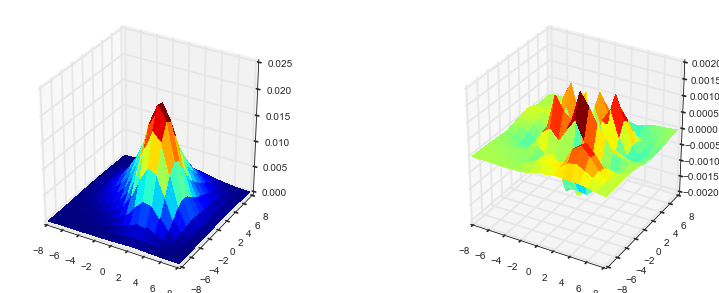

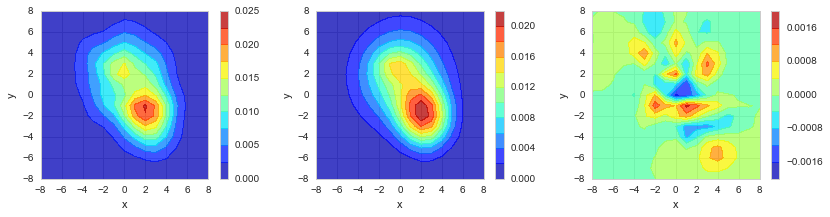

In [49]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1, xlabel='x',ylabel='y')
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2, xlabel='x',ylabel='y')
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3, xlabel='x',ylabel='y')

In [50]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

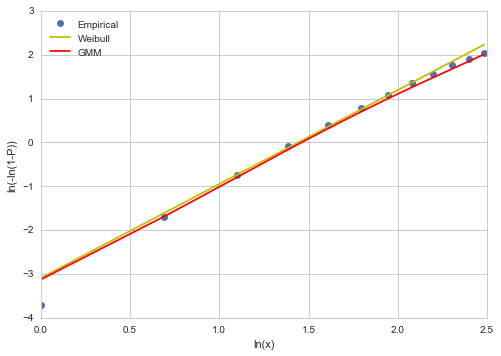

In [81]:
x = arange(0, max_speed)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'-', color = 'y', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color = 'r', label = 'GMM')

plt_configure(xlabel='ln(x)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

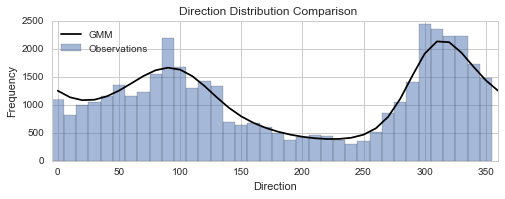

In [85]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations',figsize = (8,2.5))

plot(x/pi*180, y,'-', color='black', label='GMM')
plt_configure(title='Direction Distribution Comparison',
              xlabel='Direction',ylabel='Frequency', legend={'loc': 'best'} ,tight='xtight')

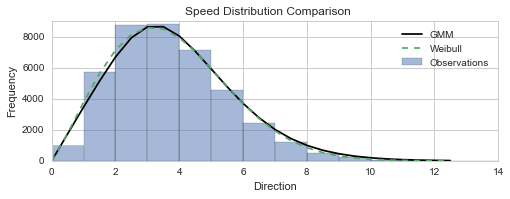

In [84]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', label='Weibull')   

plt_configure(title='Speed Distribution Comparison',
              xlabel='Direction',ylabel='Frequency',legend=True)
plt.gca().set_ylim(bottom = 0)
plt.gcf().set_size_inches(8, 2.5)
plt.locator_params(axis='y', nbins=5)

## 5.3 Sectoral Comaprison

In [54]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(14,2))
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        x = linspace(0, sub_max_speed, 20)
        y_ =[integrate.nquad(f, [[x_-0.1, x_+0.1],
                                 [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y = array(zip(*y_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plot(x, y,'-', color='black', label='GMM')
        
        # 1.3 Weibull Distribution
        y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(sub_df.speed)
        plot(x, y_weibul, '--', label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency')
        if angle == start: plt.legend() 
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        x = linspace(0, max_speed, 20)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, 
                             [[0, x_val],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        plot(x, y_ecdf,'o', label='Data')
        plot(x, y_cdf_gmm,'-', color='red', label='GMM')
        plot(x, y_cdf_weibull,'--', label='weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P')
        if angle == start: plt.legend() 
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o',label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='red',label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--', label='weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        plt.gca().set_xlim(right = log(max_speed+2))
        plt.locator_params(nbins=5)
        if angle == start: plt.legend(loc='best') 
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title,y=1)
        
        diff = abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], diff_weibull.max(), x[diff_weibull.argmax()]])
        
        plt.show()
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
    return max_diff_array

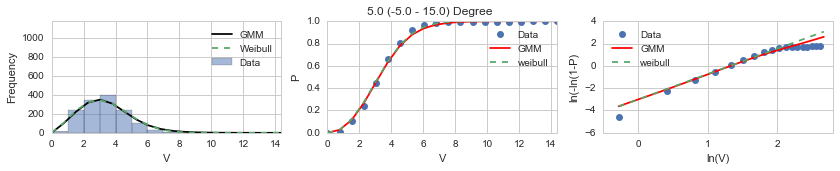

data size: 1384
max diff: 0.0377599212723 , speed value: 5.30216635458 y gmm 0.879147593179


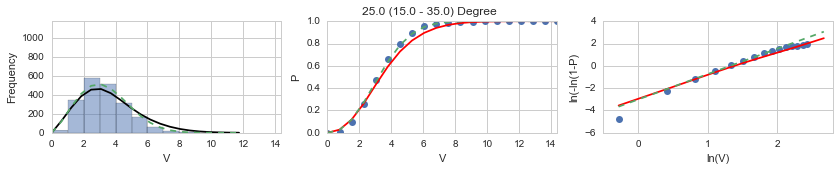

data size: 2053
max diff: 0.0705383620176 , speed value: 3.78726168184 y gmm 0.593855208367


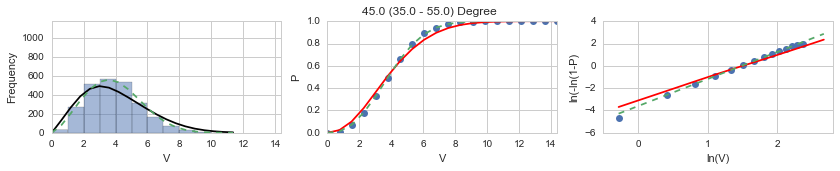

data size: 2513
max diff: 0.0559488430555 , speed value: 6.05961869095 y gmm 0.834222267171


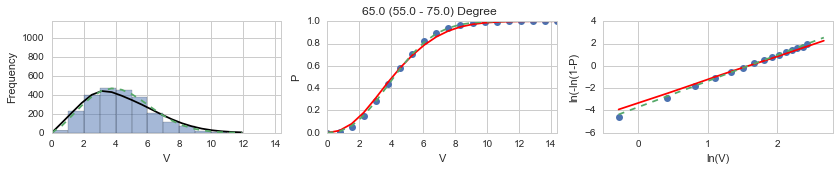

data size: 2379
max diff: 0.0402050312238 , speed value: 6.05961869095 y gmm 0.786192614846


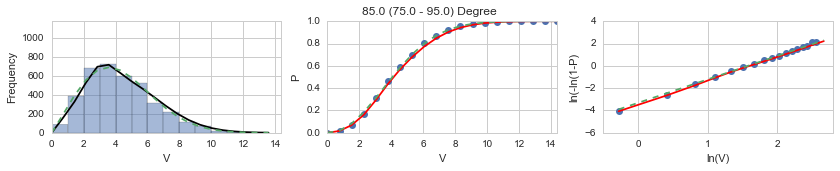

data size: 3763
max diff: 0.0321564317426 , speed value: 6.05961869095 y gmm 0.772254942161


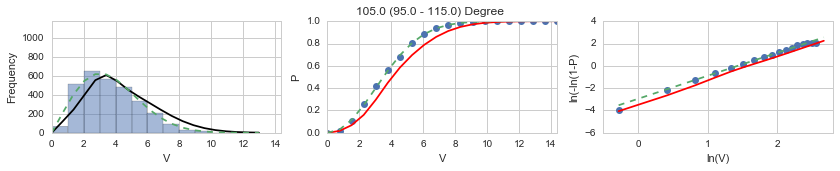

data size: 2980
max diff: 0.125669703964 , speed value: 3.02980934548 y gmm 0.296142376572


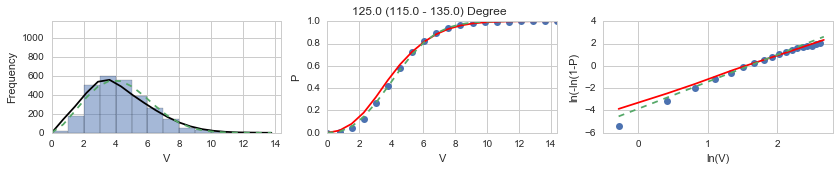

data size: 2760
max diff: 0.0568695836911 , speed value: 2.27235700911 y gmm 0.180420308329


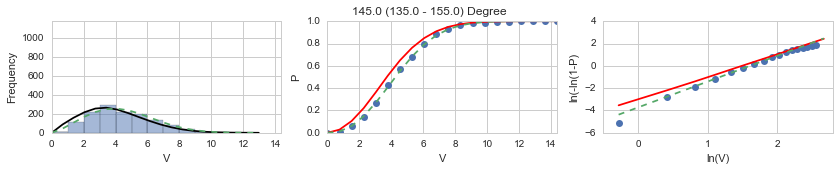

data size: 1336
max diff: 0.100591516572 , speed value: 3.02980934548 y gmm 0.36331606747


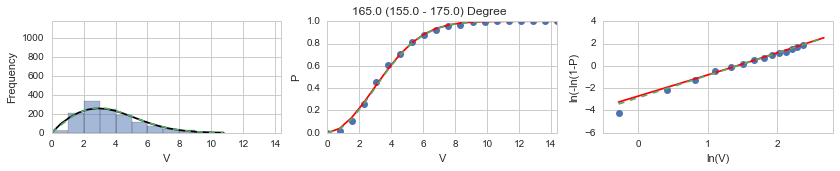

data size: 1271
max diff: 0.0368457357183 , speed value: 3.78726168184 y gmm 0.570550015659


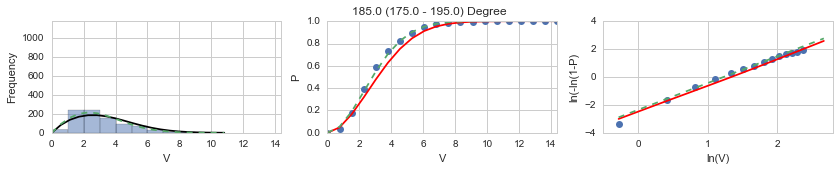

data size: 876
max diff: 0.112491311219 , speed value: 3.02980934548 y gmm 0.477691337183


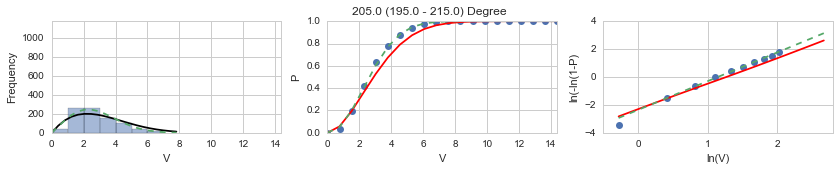

data size: 885
max diff: 0.105335729513 , speed value: 3.02980934548 y gmm 0.528562575571


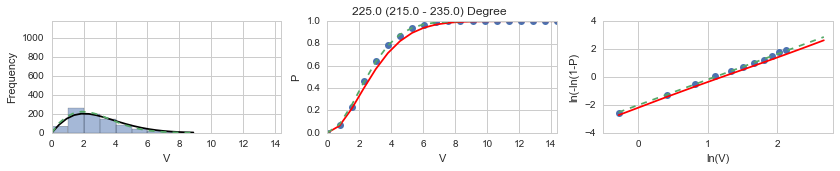

data size: 828
max diff: 0.076821800314 , speed value: 3.78726168184 y gmm 0.714241001618


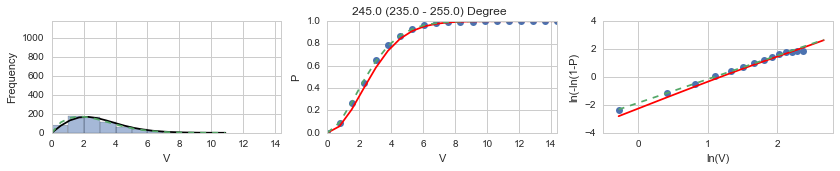

data size: 655
max diff: 0.0674379790787 , speed value: 3.02980934548 y gmm 0.582943700311


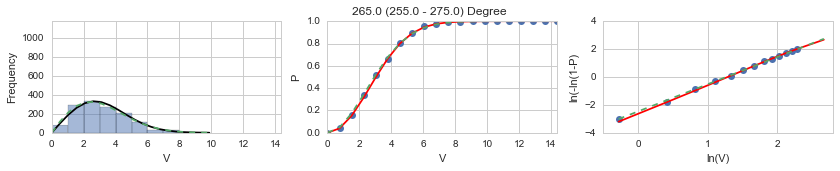

data size: 1371
max diff: 0.0220730427025 , speed value: 3.02980934548 y gmm 0.497985308866


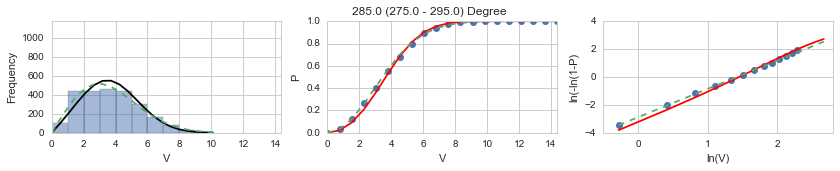

data size: 2464
max diff: 0.0616176551218 , speed value: 2.27235700911 y gmm 0.207051176047


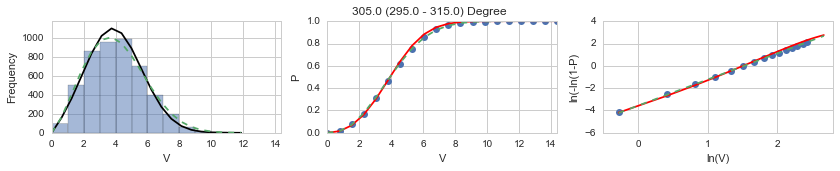

data size: 4812
max diff: 0.0275050235317 , speed value: 5.30216635458 y gmm 0.781245671911


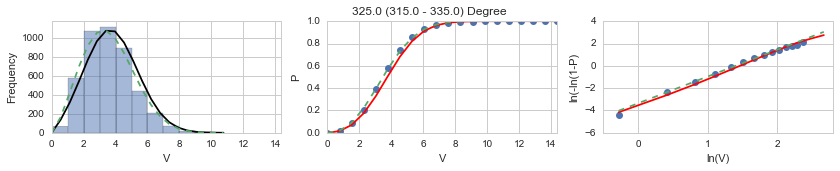

data size: 4485
max diff: 0.0714416068119 , speed value: 3.78726168184 y gmm 0.508268538116


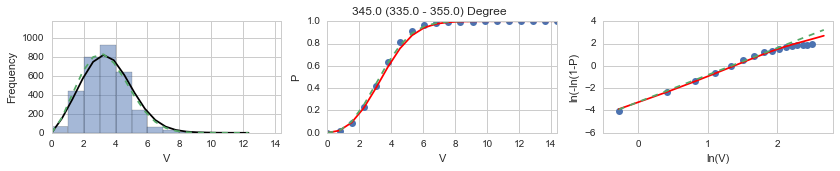

data size: 3218
max diff: 0.0557176562672 , speed value: 4.54471401821 y gmm 0.755655867661


In [55]:
if len(effective_column) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

In [56]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull'])
def nominal_avg_and_weight_avg(df_weight, df_value):
    return np.average(df_value), np.sum(df_weight / df_weight.sum() * df_value)

_, gmm_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.gmm)
_, weibull_mean = nominal_avg_and_weight_avg(diff_df.datasize, diff_df.weibull)

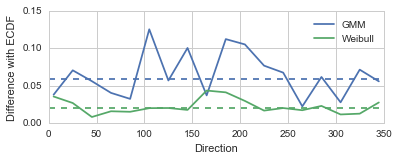

In [57]:
line, = plot(diff_df.direction, diff_df.gmm, '-', label = 'GMM')
plt.axhline(gmm_mean, linestyle='--', color = line.get_color())
line,= plot(diff_df.direction, diff_df.weibull, '-', label = 'Weibull')
plt.axhline(weibull_mean, linestyle='--', color = line.get_color())
plt_configure(xlabel='Direction', ylabel='Difference with ECDF', legend={'loc':'best'})
plt.gcf().set_size_inches(6, 2)
plt.locator_params(axis='y', nbins=5)

In [58]:
diff_df

,datasize,direction,gmm,speed_gmm,weibull,speed_weibull
0,1384,5.0,0.037760,5.302166,0.035327,2.272357
1,2053,25.0,0.070538,3.787262,0.026591,3.787262
2,2513,45.0,0.055949,6.059619,0.007802,5.302166
3,2379,65.0,0.040205,6.059619,0.015505,6.059619
4,3763,85.0,0.032156,6.059619,0.014811,3.787262
5,2980,105.0,0.125670,3.029809,0.019692,3.029809
6,2760,125.0,0.056870,2.272357,0.019876,2.272357
7,1336,145.0,0.100592,3.029809,0.017319,3.787262
8,1271,165.0,0.036846,3.787262,0.043328,3.787262
9,876,185.0,0.112491,3.029809,0.040927,3.029809


### 5.3.1 Variability over the years

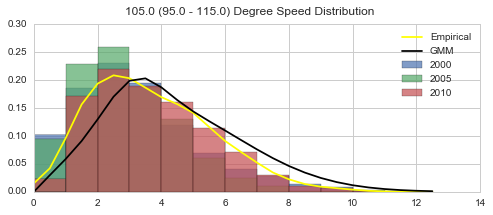

In [59]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.02
plot(x_vals, y_vals,'-', color='black', label = 'GMM')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt_configure(title='%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle),
              legend=True)
plt.gca().set_ylim(bottom = 0)
plt.gcf().set_size_inches(8, 3)

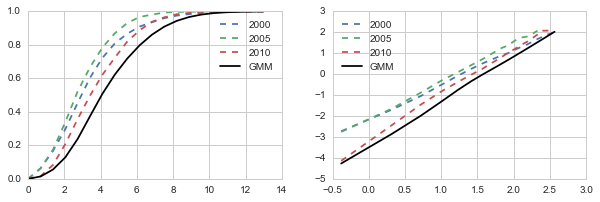

In [60]:
fig = plt.figure(figsize=(10,3))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, 
                     [[0, x_val],
                      [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, 
                                 [[0, inf],
                                  [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plot(x, y_gmm,'-', color='black', label='GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plot(log(x), log(-log(1-y_gmm)),'-', color='black',label='GMM')
plt.legend(loc='best')

### 5.3.2 Bootstrap, to see the variability of each sector

(0, 400.0)

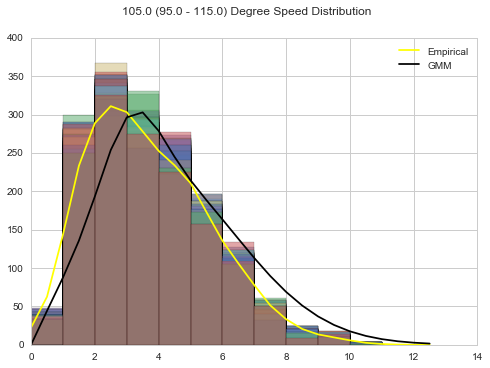

In [61]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

#2. GMM
y_vals_ =[integrate.nquad(f, 
                          [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, 
                                 [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
plot(x_vals, y_vals,'-', color='black', label='GMM')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt_configure(title='%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle), 
              legend=True)
plt.gca().set_ylim(bottom = 0)

0.112587649434 4.09829466095 0.508217719694


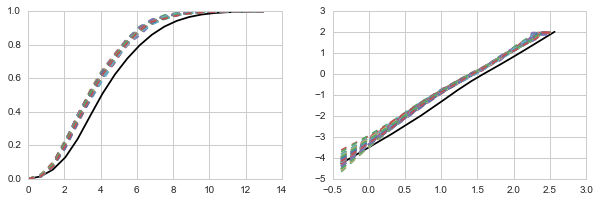

In [62]:
fig = plt.figure(figsize=(10,3))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variability of results & Cross-Validation

In [63]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.597,0.054,1.931,2.824,3.031,-0.004
2,0.372,2.268,-1.939,1.615,1.985,-0.061
3,0.031,-0.425,2.842,1.072,0.890,0.006


GMM Plot Result
0.596720327596 [[ 0.0542768   1.93067582]] [ 2.82400781  3.0313167 ] -178.375323478
0.372301812115 [[ 2.26781219 -1.93861095]] [ 1.60626631  1.99177885] -171.876050838
0.0309778602891 [[-0.42459265  2.84224012]] [ 0.8904115   1.07206111] -89.0703598579


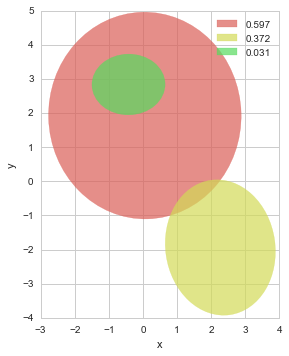

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.021829,0.01299,1.774835e-07,0.018245,0.122887,0.992517


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.457,2.300,-1.805,1.712,2.094,-0.047
2,0.436,-0.454,2.001,2.391,3.062,0.210
3,0.107,0.188,3.123,3.281,1.279,-0.138


GMM Plot Result
0.456962726874 [[ 2.30018286 -1.80487337]] [ 1.706305    2.09821887] -173.42191196
0.436499392641 [[-0.45424172  2.00123085]] [ 2.27049126  3.15196403] 159.9611542
0.106537880485 [[ 0.18813792  3.12320004]] [ 1.26424357  3.28666037] -93.6080857177


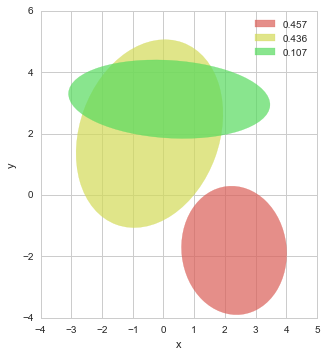

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.023177,0.009655,1.949997e-07,0.019368,0.128851,0.991634


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.583,0.073,1.864,2.838,3.083,-0.004
2,0.373,2.264,-1.967,1.629,1.977,-0.058
3,0.044,-0.339,2.849,1.458,0.934,-0.019


GMM Plot Result
0.58276840381 [[ 0.07334222  1.86389232]] [ 2.83766287  3.08301557] -178.773285372
0.373145624641 [[ 2.2642801  -1.96669193]] [ 1.62055588  1.98391722] -171.762729644
0.0440859715485 [[-0.33878192  2.84851618]] [ 0.93338418  1.45776472] -91.1749622881


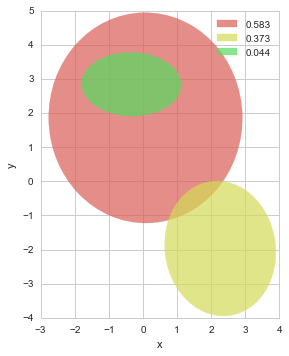

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.018076,0.010653,1.904127e-07,0.018699,0.127297,0.991962


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.575,0.036,1.810,2.800,3.120,0.024
2,0.376,2.290,-1.935,1.622,1.989,-0.065
3,0.049,-0.242,2.937,1.758,0.969,-0.059


GMM Plot Result
0.574821811014 [[ 0.03623889  1.80956947]] [ 2.79571294  3.12380327] 173.884484372
0.376202010763 [[ 2.28995223 -1.93519135]] [ 1.61221445  1.99697225] -171.18478623
0.0489761782238 [[-0.24172592  2.93740479]] [ 0.96694772  1.75974529] -92.6793608778


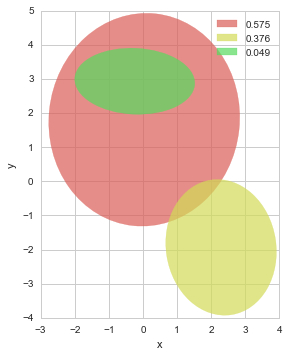

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.020299,0.009678,1.839794e-07,0.018588,0.125102,0.992221


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.484,2.232,-1.735,1.738,2.103,-0.044
2,0.403,-0.622,2.182,2.325,3.064,0.251
3,0.113,0.465,3.046,3.228,1.245,-0.149


GMM Plot Result
0.484071170417 [[ 2.23222985 -1.73477829]] [ 1.7325735   2.10726291] -173.599815355
0.402871455177 [[-0.62155366  2.18238444]] [ 2.17262365  3.17361438] 159.043342964
0.113057374406 [[ 0.46489932  3.04620772]] [ 1.22814076  3.23391688] -93.8559713617


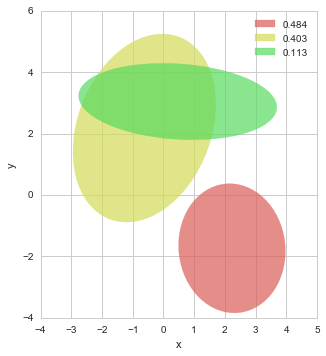

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.023801,0.009488,2.073352e-07,0.019848,0.132744,0.99121


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.592,0.038,2.027,2.793,2.965,0.032
2,0.386,2.295,-1.986,1.663,2.008,-0.061
3,0.022,-0.465,2.627,0.900,0.737,0.021


GMM Plot Result
0.592126546944 [[ 0.03803792  2.02663397]] [ 2.78116769  2.97644027] 165.857968052
0.385623239607 [[ 2.29517628 -1.98628065]] [ 1.65350669  2.01574454] -171.014576882
0.0222502134494 [[-0.46512519  2.62654943]] [ 0.73642401  0.90004523] -86.9799211909


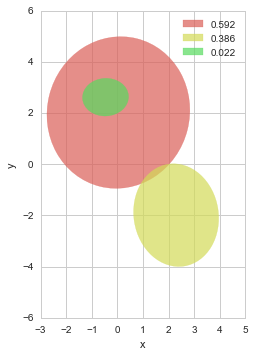

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.017601,0.012798,1.758091e-07,0.018565,0.122258,0.992451


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.592,0.049,1.862,2.826,3.120,0.005
2,0.371,2.248,-1.939,1.628,1.993,-0.082
3,0.037,-0.437,2.870,1.136,0.894,0.012


GMM Plot Result
0.59242134653 [[ 0.0493777   1.86198391]] [ 2.82603082  3.12040641] 178.681661652
0.370893451352 [[ 2.24786126 -1.93890952]] [ 1.61171833  2.00575107] -168.99835226
0.0366852021174 [[-0.4369578   2.87027795]] [ 0.89362453  1.13581825] -88.6282553248


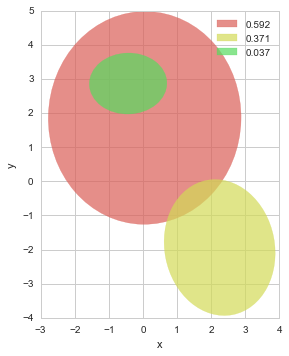

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.017801,0.011805,2.038218e-07,0.019237,0.131738,0.99135


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.577,0.031,1.990,2.803,2.994,0.038
2,0.394,2.255,-1.956,1.660,2.022,-0.079
3,0.029,-0.491,2.776,1.126,0.860,-0.026


GMM Plot Result
0.576709809725 [[ 0.03114138  1.98952802]] [ 2.78760949  3.00805948] 165.153318444
0.394379085183 [[ 2.25548238 -1.95576265]] [ 1.64516902  2.03416285] -169.176547819
0.0289111050924 [[-0.49090931  2.77598159]] [ 0.85954784  1.12642557] -92.7647399771


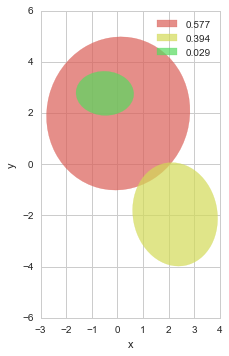

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.020158,0.011562,1.907389e-07,0.018947,0.127416,0.991943


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.483,2.167,-1.716,1.725,2.112,-0.057
2,0.390,-0.657,2.163,2.338,3.098,0.285
3,0.127,0.286,3.114,3.372,1.366,-0.215


GMM Plot Result
0.483412957895 [[ 2.16720006 -1.71585116]] [ 1.71692292  2.11869042] -172.156280641
0.389580429124 [[-0.65694897  2.16327811]] [ 2.14750022  3.23311341] 157.515824884
0.12700661298 [[ 0.28647687  3.11359998]] [ 1.32797138  3.38716061] -95.8823665758


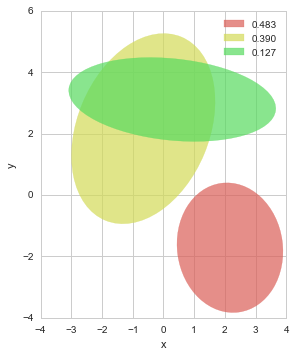

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025103,0.009184,1.963218e-07,0.019365,0.129307,0.991572


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.592,-0.006,1.995,2.807,2.951,0.005
2,0.384,2.239,-1.952,1.669,2.018,-0.052
3,0.024,-0.426,2.657,0.991,0.785,0.043


GMM Plot Result
0.592323007555 [[-0.00583607  1.99492704]] [ 2.80662183  2.95182685] 176.95060757
0.383513334477 [[ 2.238501   -1.95219176]] [ 1.66213089  2.02344617] -172.447602053
0.024163657968 [[-0.42593713  2.65713147]] [ 0.78296582  0.99258034] -84.8136195203


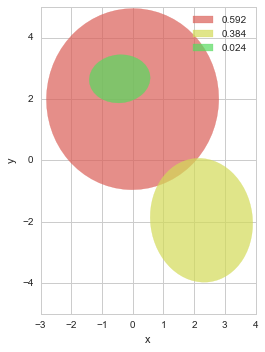

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.016979,0.01138,1.779199e-07,0.018583,0.123031,0.992401


In [64]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross-validation, to select the number of Gaussian

In [65]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 30427.5 10142.5
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.086427,0.049530,0.000002,0.064063,0.429255,0.907945
1,0.086041,0.050105,0.000002,0.063979,0.434180,0.905631
2,0.087291,0.048510,0.000002,0.064138,0.424728,0.909783
3,0.083682,0.048879,0.000002,0.063993,0.423880,0.910189


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.090179,0.047863,0.000002,0.064897,0.430359,0.907207
1,0.090022,0.045556,0.000002,0.063552,0.409726,0.916540
2,0.081760,0.055239,0.000002,0.064093,0.440069,0.903367
3,0.097304,0.050175,0.000002,0.064913,0.445380,0.900796


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.022687,0.014730,2.735329e-07,0.022808,0.152599,0.988299
1,0.022655,0.015442,2.815097e-07,0.023272,0.154746,0.987971
2,0.021306,0.014369,2.820942e-07,0.023293,0.154929,0.988093
3,0.022239,0.015749,2.741899e-07,0.022649,0.152690,0.988360


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.023639,0.011447,3.312437e-07,0.025177,0.167714,0.986155
1,0.028789,0.022448,3.255864e-07,0.024539,0.166477,0.986353
2,0.028651,0.016711,3.391600e-07,0.025053,0.169839,0.985263
3,0.024440,0.011143,3.464670e-07,0.026404,0.171838,0.985193


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.018976,0.012164,1.726712e-07,0.017997,0.121243,0.992692
1,0.015613,0.009645,1.691991e-07,0.018147,0.119968,0.992778
2,0.019112,0.012393,1.806127e-07,0.018486,0.123922,0.992311
3,0.023251,0.009630,1.961424e-07,0.019336,0.129193,0.991646


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025748,0.021634,2.608513e-07,0.022819,0.148832,0.988744
1,0.025435,0.016503,2.615706e-07,0.021626,0.149222,0.988997
2,0.019851,0.011313,2.200717e-07,0.020683,0.136963,0.990668
3,0.029782,0.016685,2.523150e-07,0.021900,0.146470,0.989324


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014419,0.006542,1.144985e-07,0.014697,0.098698,0.995129
1,0.013068,0.007971,7.857097e-08,0.012229,0.081772,0.996657
2,0.013518,0.005665,9.556697e-08,0.013615,0.090164,0.995940
3,0.011558,0.006996,7.930033e-08,0.012244,0.082133,0.996622


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.019907,0.009294,1.211881e-07,0.015418,0.101543,0.994849
1,0.014742,0.009082,1.267257e-07,0.015554,0.103789,0.994614
2,0.018001,0.009569,2.125491e-07,0.019590,0.134501,0.990937
3,0.017843,0.009636,1.336598e-07,0.016140,0.106660,0.994345


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.007794,0.003982,5.195251e-08,0.009975,0.066489,0.997789
1,0.006489,0.003649,5.026429e-08,0.009759,0.065398,0.997866
2,0.008279,0.004203,5.185938e-08,0.009971,0.066430,0.997788
3,0.007019,0.004945,5.466470e-08,0.010170,0.068180,0.997677


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.012336,0.006542,1.153669e-07,0.014704,0.099048,0.995106
1,0.011221,0.010542,1.365208e-07,0.016253,0.107754,0.994170
2,0.012820,0.012075,1.254570e-07,0.015309,0.103283,0.994713
3,0.009826,0.007654,9.404993e-08,0.013522,0.089516,0.995991


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.005790,0.003399,3.770589e-08,0.008489,0.056637,0.998402
1,0.012685,0.002898,4.892109e-08,0.009723,0.064480,0.997913
2,0.006236,0.003693,3.806250e-08,0.008406,0.056914,0.998385
3,0.011114,0.005501,4.025887e-08,0.008794,0.058549,0.998281


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013167,0.007614,1.079752e-07,0.014270,0.095853,0.995364
1,0.014921,0.008564,9.991885e-08,0.013507,0.092350,0.995789
2,0.010785,0.007901,1.005850e-07,0.014402,0.092467,0.995693
3,0.016988,0.014526,1.018758e-07,0.013746,0.092983,0.995718


In [66]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.085860,0.049256,2.153454e-06,0.064043,0.428011,0.908387
1,0.022222,0.015072,2.778317e-07,0.023006,0.153741,0.988181
2,0.019238,0.010958,1.796564e-07,0.018491,0.123581,0.992357
3,0.013141,0.006794,9.198420e-08,0.013196,0.088192,0.996087
4,0.007395,0.004195,5.218522e-08,0.009969,0.066624,0.997780
5,0.008956,0.003873,4.123709e-08,0.008853,0.059145,0.998245


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.089816,0.049708,2.189788e-06,0.064364,0.431384,0.906978
1,0.026380,0.015437,3.356143e-07,0.025293,0.168967,0.985741
2,0.025204,0.016534,2.487022e-07,0.021757,0.145372,0.989433
3,0.017623,0.009395,1.485306e-07,0.016676,0.111624,0.993686
4,0.011551,0.009204,1.178487e-07,0.014947,0.099900,0.994995
5,0.013965,0.009651,1.025887e-07,0.013981,0.093413,0.995641


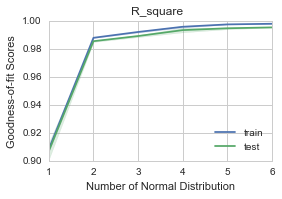

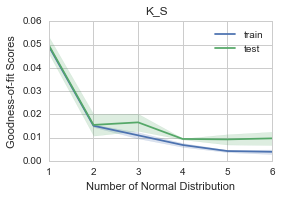

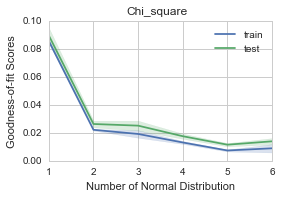

In [78]:
prop_cycle=mpl.rcParams['axes.color_cycle']
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 2.5)
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    plt.gca().set(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores')
    plt.suptitle(column)
    plt.legend(loc='best')
    plt.show()

In [68]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [69]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        